In [1]:
import pymc

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

In [4]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.5

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

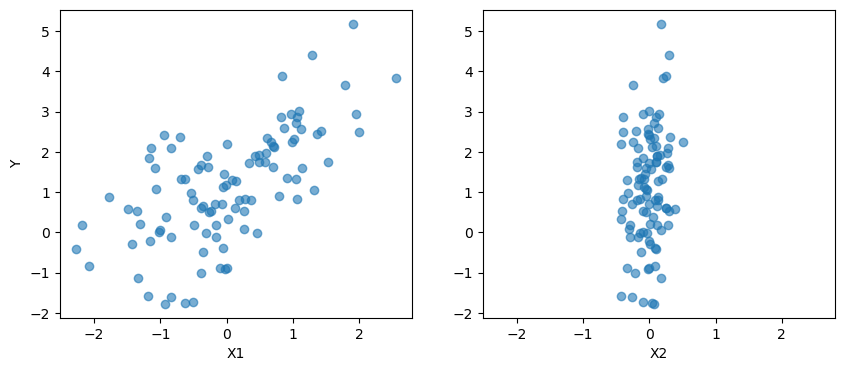

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");


In [6]:
import pymc as pm
basic_model = pm.Model()

In [7]:
with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Beta("alpha", mu=0.5, sigma=0.4)
    beta = pm.Beta("beta", mu=0.5, sigma=0.4, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    y1 = alpha + beta[0] * X1 + beta[1] * X2
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=y1, sigma=sigma, observed=Y)

In [8]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.


In [10]:
basic_model.debug()

point={'alpha_logodds__': array(inf), 'beta_logodds__': array([inf, inf]), 'sigma_log__': array(0.)}

The variable alpha has the following parameters:
0: -1.0 [id A] <Scalar(float64, shape=())>
1: -0.0 [id B] <Scalar(float64, shape=())>
The parameters evaluate to:
0: -1.0
1: -0.0
This does not respect one of the following constraints: alpha > 0, beta > 0

The variable beta has the following parameters:
0: -1.0 [id A] <Scalar(float64, shape=())>
1: -0.0 [id B] <Scalar(float64, shape=())>
The parameters evaluate to:
0: -1.0
1: -0.0
This does not respect one of the following constraints: alpha > 0, beta > 0

You can set `verbose=True` for more details


In [11]:
pm.Beta?

In [9]:
import arviz as az

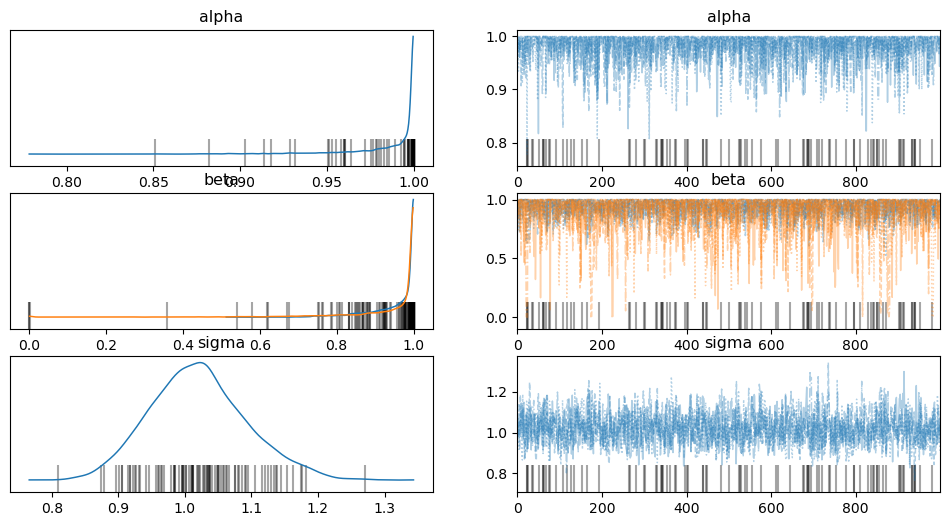

In [10]:
az.plot_trace(idata, combined=True);

In [11]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.98,0.03,0.93,1.00,0.0,0.0,991.69,761.12,1.01
beta[0],0.95,0.07,0.81,1.00,0.0,0.0,1205.69,889.32,1.00
beta[1],0.91,0.15,0.66,1.00,0.0,0.0,1140.32,662.34,1.00
sigma,1.02,0.07,0.89,1.16,0.0,0.0,1752.42,2111.44,1.00


array([[<Axes: ylabel='beta\n0'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='beta\n1'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='alpha', ylabel='sigma'>, <Axes: xlabel='beta\n0'>,
        <Axes: xlabel='beta\n1'>]], dtype=object)

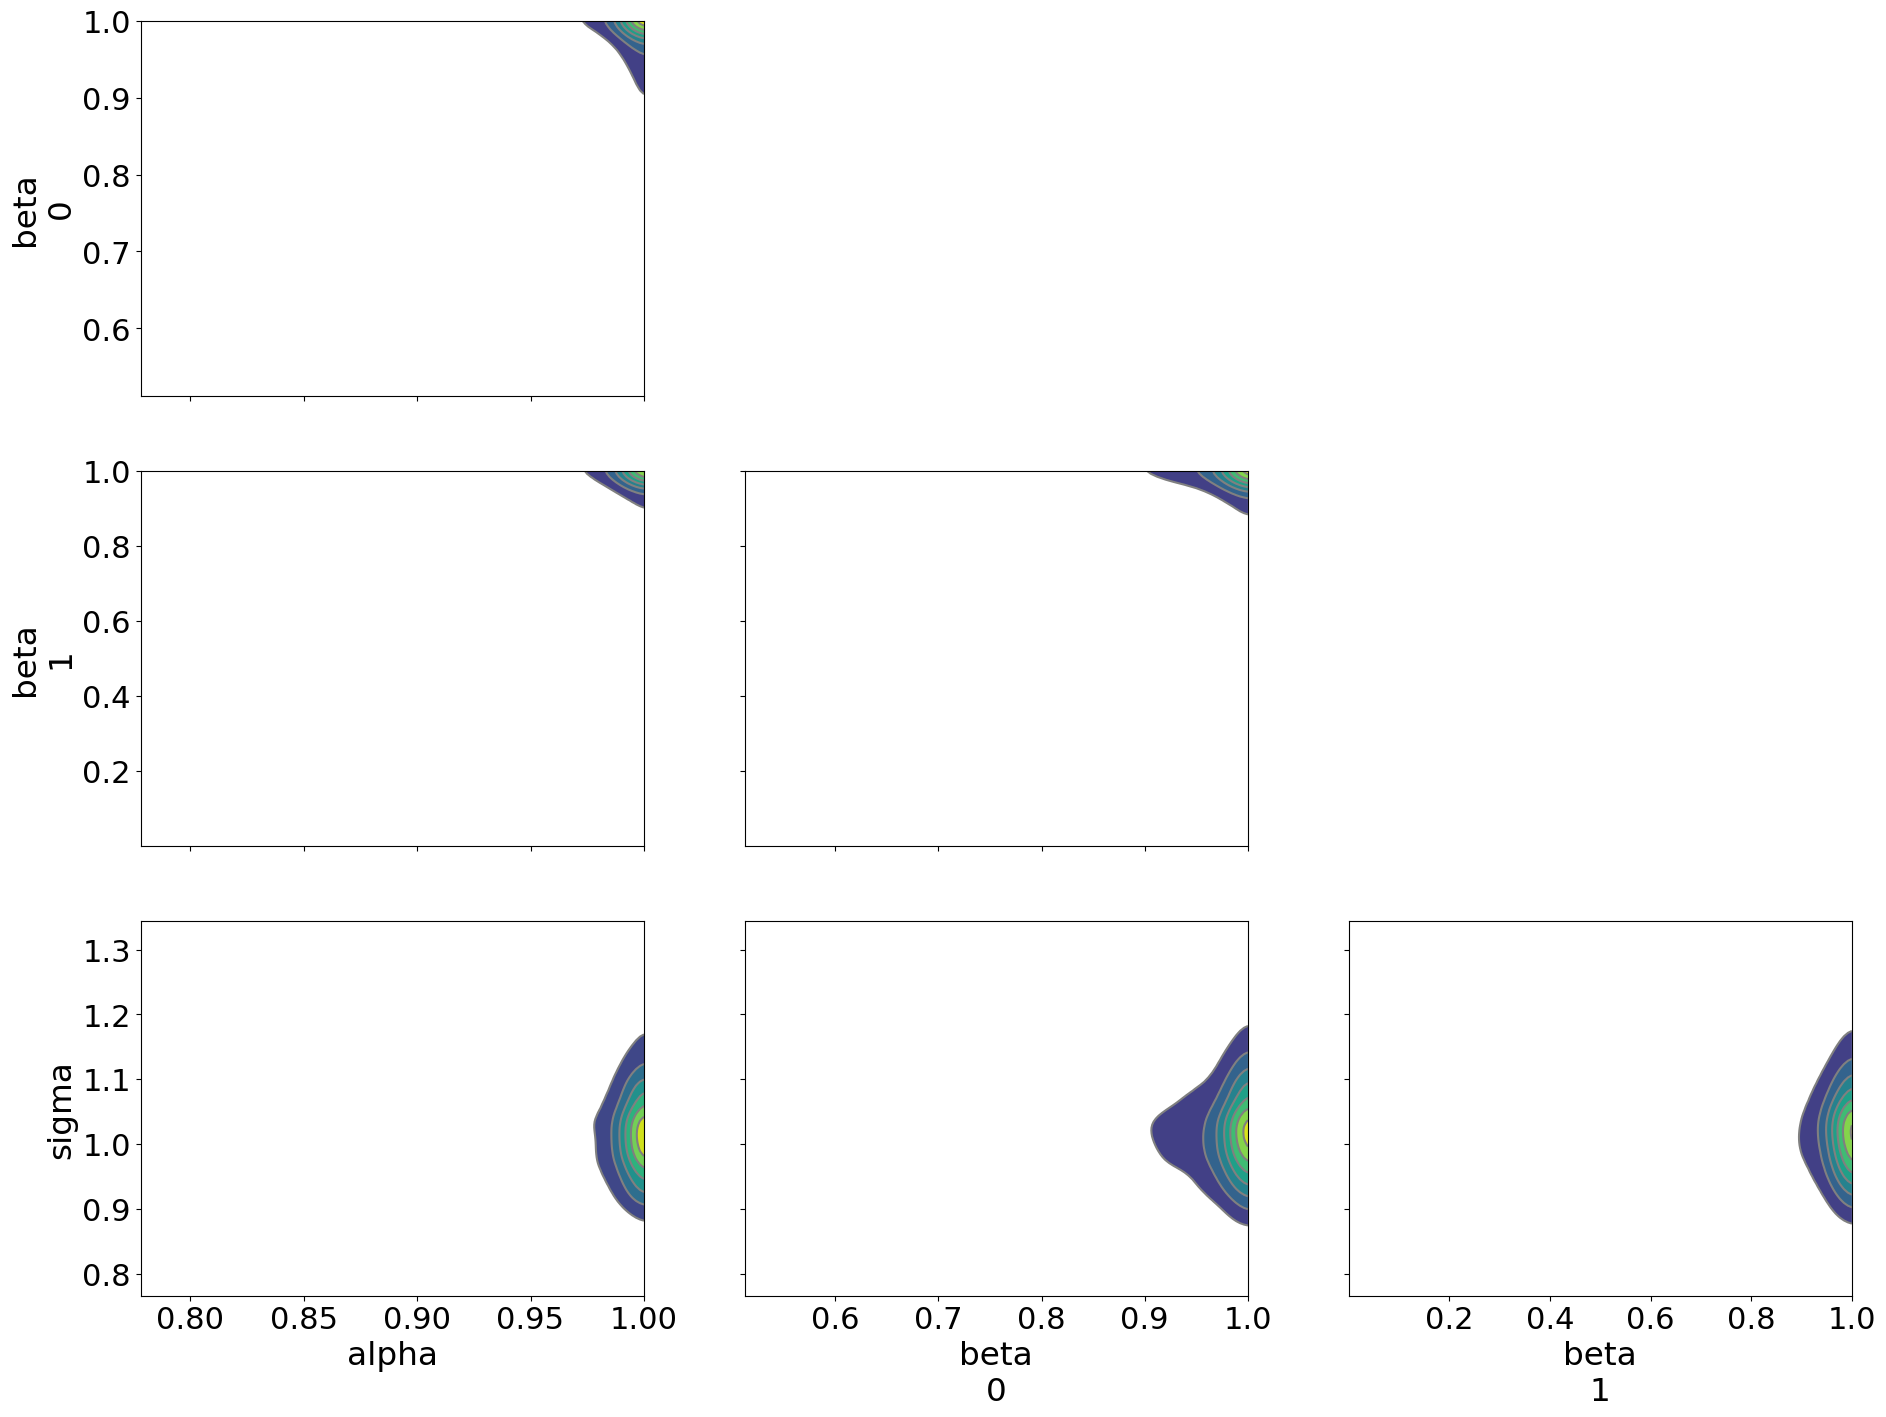

In [17]:
az.plot_pair(
    idata,    
    kind="kde",
    textsize=22,
)
